<a href="https://colab.research.google.com/github/Diksh-aaa/Handwritten-Digit-System/blob/main/Handwritten_Digit_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## **Handwritten Digit System**
---
The project aims to train a machine learning model to recognize individual digits. MNIST Dataset has been use to train the model using beginner-friendly libraries like TensorFlow.

Forfurther development in this project, it will be proposed to have a GUI system, which will ensure interactive environment between the user and the developer. The GUI maybe anything from a canvas or uploading images of single digits or even scanning image from local device using the webcam.

**Due to lack of support of GUI systems and files on Google Colab they have not been developed in this project.




---



# **Importing Libraries for building and training model**

We start with importing TensorFlow and Keras libraries to train and build out Neural Network.

1.   NumPy: Supports numerical operations on arrays.
2.   Tensorflow and Keras: providing tools for building and training the neural networks.
3. Keras Layers: Provide different types of layers for constructing the neural network.
4. Sequential Model: Allows for a straightforward, layer-by-layer model construction.
5. Utility Functions: Help preprocess and transform data for training.






In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.utils import to_categorical



---



# **Importing MNIST Dataset Module from Keras**


---

MNIST Dataset is loaded in this part. MNIST Dataset consists a total of 70,000 handwritten images of umbers 0-9. Out of them, 60,000 images are for training set and 10,000 images are for testing set.
The keras.datasets module provide a few toy datasets (already-vectorized, in Numpy format) that can be used for debugging a model or creating simple code examples.

We load the MNIST Dataset in 4 parts:
*   train_images: Images used for training the model.
*   train_labels: Labels corresponding to the training images.
*   test_images: Images used for testing the model.
*   test_labels: Labels corresponding to the test images.









In [2]:
MNIST = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = MNIST.load_data()

###train_images=x_train;     train_labels=y_train;     test_images=x_test;     test_labels=y_test

In this section, we print the shapes of train_images and test_images array.
(60000, 28,28) indicates that there are 60000 images each of 28x28 pixels. and (10000, 28, 28) indicates 10000 images of each 28x28 pixels.

In [3]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)




---



# **Preprocessing the Dataset**


---


*   .astype('float32'):  Converts datatype from integers (which typically range from 0 to 255) to floating-point numbers (float32). The reasoning behind this is neural networks generally perform better with input data that is normalized and of type float.

*   / 255 : Scales the pixel values to a range between 0 and 1. This is achieved by dividing each pixel value by 255, the maximum intensity value for a pixel in an 8-bit grayscale image.




In [4]:
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255



*   np.expand_dims(train_images, axis=-1): This function call adds a new axis (dimension) at the end (axis=-1) of the train_images array.
*  Here adding an extra dimension is typically used to indicate the number of color channels.
* The extra dimension (1) indicates that each image has one color channel (grayscale).

The purpose of adding extra dimension is to make sure the input shape is in the form of 4D tensor. It is because many neural networks expect input in the form of (batch_size, height, width, channels) where:



*   *batch_size* is the number of samples in each batch,

*   *height and width* are the dimensions of each image,
*   *channels* denotes the number of color channels (1 for grayscale, 3 for RGB).









In [5]:
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


We use 'to_categorical' from Keras to convert the categorical labels (train_labels and test_labels) into one-hot encoded format.

'train_labels' and 'test_labels' originally contain integers (0 to 9), representing the digits in the images. After 'to_categorical', these labels are transformed into binary vectors suitable for training a neural network model that predicts the digit shown in each image.


In [6]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)



---



# **Building the Model**

---

The model starts with two Conv2D layers using ReLU activation to extract features, followed by MaxPooling2D layers to downsample.

After flattening the output, two Dense layers use ReLU activation for learning complex patterns, with the final Dense layer using softmax activation to output probabilities for each digit class (0-9).

This architecture efficiently processes 28x28 grayscale images, achieving high accuracy in digit recognition tasks.

In [7]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

'.summary()' is used to see a concise summary of the model architecture and the number of parameters

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 64)                1

'tf.keras.utils.plot_model' will generate a graphical representation of your CNN model, displaying the layer connections, shapes of inputs/outputs, and layer names if provided.

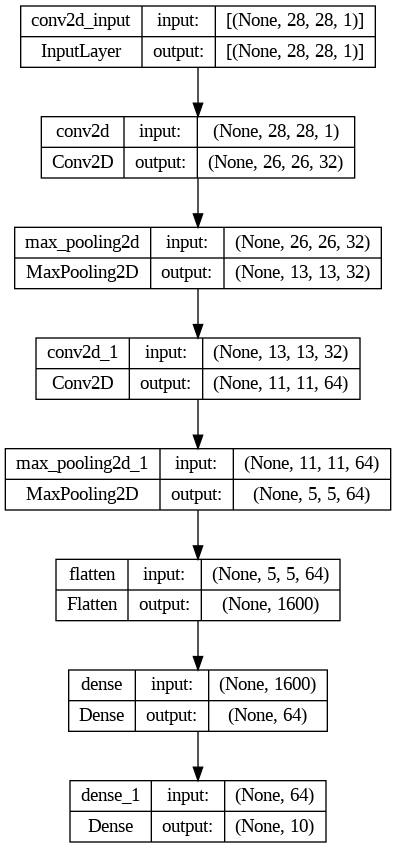

In [9]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
)



---



# **Compiling the model**

---

'.compile()' is used to compile the model.

Optimizer ('adam'): Adjusts model weights based on gradient descent with adaptive learning rates, beneficial for efficient training.

Loss ('categorical_crossentropy'): Computes the disparity between predicted probabilities and actual one-hot encoded labels, suitable for multi-class classification tasks like MNIST digit recognition.

Metrics (['accuracy']): Monitors the model's classification accuracy during training and evaluation, providing insights into its performance.

In [10]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])



---



# **Training the model**

---

'.fit()' is used to train the model on the provided dataset(train_images and train_labels) and evaluates it on the validation data (test_images and test_labels).

*Epochs (epochs=10)*: Number of times the entire dataset is passed forward and backward through the neural network during training.

*Batch Size (batch_size=200)*: Number of samples per gradient update. Larger batch sizes can provide a more stable estimate of the gradient.

*Validation Data (validation_data=(test_images, test_labels))*: Data on which to evaluate the loss and any model metrics at the end of each epoch. Here, test_images and test_labels are used to validate the model's performance on unseen data.

In [11]:
training_history = model.fit(train_images, train_labels, epochs=10, batch_size=200, validation_data=(test_images, test_labels))

Epoch 1/10
300/300 [==============================] - 52s 169ms/step - loss: 0.2977 - accuracy: 0.9122 - val_loss: 0.0831 - val_accuracy: 0.9751
Epoch 2/10
300/300 [==============================] - 51s 169ms/step - loss: 0.0698 - accuracy: 0.9789 - val_loss: 0.0573 - val_accuracy: 0.9809
Epoch 3/10
300/300 [==============================] - 52s 174ms/step - loss: 0.0486 - accuracy: 0.9856 - val_loss: 0.0407 - val_accuracy: 0.9857
Epoch 4/10
300/300 [==============================] - 51s 172ms/step - loss: 0.0388 - accuracy: 0.9883 - val_loss: 0.0389 - val_accuracy: 0.9874
Epoch 5/10
300/300 [==============================] - 50s 167ms/step - loss: 0.0332 - accuracy: 0.9896 - val_loss: 0.0310 - val_accuracy: 0.9894
Epoch 6/10
300/300 [==============================] - 50s 165ms/step - loss: 0.0267 - accuracy: 0.9918 - val_loss: 0.0282 - val_accuracy: 0.9902
Epoch 7/10
300/300 [==============================] - 50s 166ms/step - loss: 0.0224 - accuracy: 0.9934 - val_loss: 0.0298 - val_ac



---



# **Change in loss and accuracy**

---

Loss Plot: Visualizes how the training and validation loss change over epochs, helping to monitor model convergence and detect overfitting or underfitting.

Accuracy Plot: Shows the training and validation accuracy trends over epochs, indicating how well the model learns from the training data and generalizes to unseen validation data.

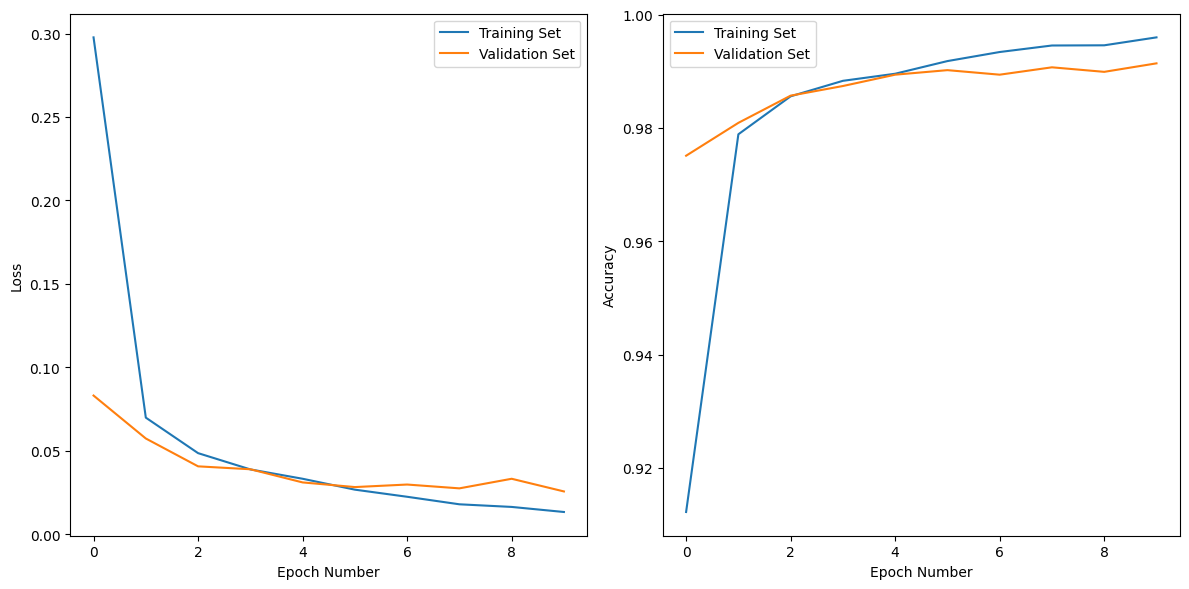

In [12]:
import matplotlib.pyplot as plt

# Plotting the loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(training_history.history['loss'], label='Training Set')
plt.plot(training_history.history['val_loss'], label='Validation Set')
plt.legend()

# Plotting the accuracy
plt.subplot(1, 2, 2)
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['accuracy'], label='Training Set')
plt.plot(training_history.history['val_accuracy'], label='Validation Set')
plt.legend()

plt.tight_layout()
plt.show()




---



We compare the accuracy of our model on training set and on test set. We expect our model to perform similarly on both sets.
If the performance on a test set will be poor comparing to a training set it would be an indicator for us that the model is *overfitted* and we have a "high variance" issue.

In [14]:
# Evaluate on training data
train_loss, train_accuracy = model.evaluate(train_images, train_labels)
print('Training loss: ', train_loss)
print('Training accuracy: ', train_accuracy)

# Evaluate on validation data
validation_loss, validation_accuracy = model.evaluate(test_images, test_labels)
print('Validation loss: ', validation_loss)
print('Validation accuracy: ', validation_accuracy)


1875/1875 [==============================] - 20s 11ms/step - loss: 0.0077 - accuracy: 0.9980
Training loss:  0.00766767468303442
Training accuracy:  0.9979666471481323
313/313 [==============================] - 3s 9ms/step - loss: 0.0256 - accuracy: 0.9914
Validation loss:  0.02562178298830986
Validation accuracy:  0.9914000034332275




---

